# Stock Tail Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2016-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD'

In [3]:
df = yf.download("AMD", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [6]:
def tail_ratio(stock_returns):
    tailRatio = np.percentile(stock_returns, 95) / abs(np.percentile(stock_returns, 5))
    return tailRatio

Text(0, 0.5, 'Tail Ratio')

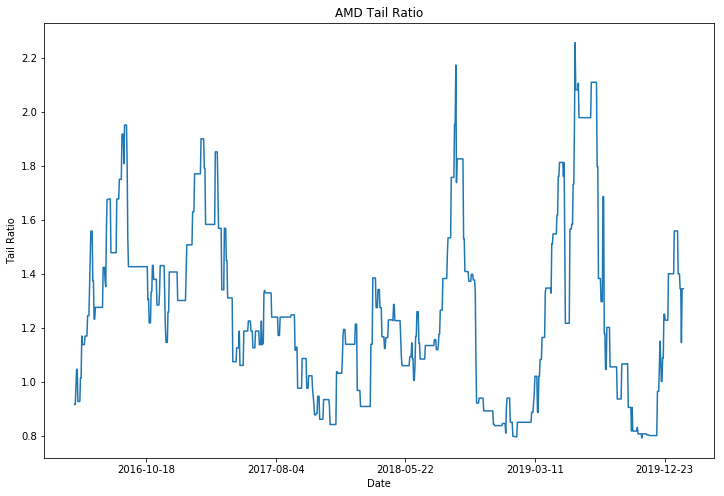

In [7]:
# Compute the running Tail ratio
running = [tail_ratio(returns[i-90:i]) for i in range(90, len(returns))]

# Plot running Tail ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df['Adj Close'].index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Tail Ratio')
plt.xlabel('Date')
plt.ylabel('Tail Ratio')

In [8]:
tail_ratio(returns)

1.2047832234037397